In [2]:
pip install pandas openpyxl

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd

In [20]:
df_2021_2022 = pd.read_csv('sample_data/Master2021_2022.csv')
df_2021_2022

,Mentor ID,Mentee ID,Relation[Created At],"Posts in {""en""=>""Finding\nInspiration""}","Posts in {:en=>""Career\nConsiderations - part 1""}","Posts in {:en=>""Entering the\nJob Market - part 1""}","Posts in {:en=>""Post-secondary\nConsiderations - part 1""}","Posts in {:en=>""Paying for\nSchool - part 1""}","Posts in {""en""=>""From Rural to\nUrban - part 1""}","Posts in {""en""=>""Studying ""}",...,"Posts in {:en=>""Entering the\nJob Market - Ext. Activity:\nPractice Interview""}","Posts in {:en=>""Complete\nConversation""} Well being and self care","Posts in {:en=>""Complete\nConversation""} Studying","Posts in {:en=>""Complete\nConversation""} Career Considerations","Posts in {:en=>""Complete\nConversation""} Post secondary considerations","Posts in {:en=>""Paying for\nSchool – Ext. Activity:\nScholarship Applications""}","Posts in {:en=>""Complete\nConversation""} Agency in the World","Posts in {:en=>""Complete\nConversation""} Getting Hired","Posts in {:en=>""Complete\nConversation""} Rural to urban","Posts in {:en=>""Complete\nConversation""} Paying for school"
0,1047556157,1047556709,4/8/2022 21:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1047553889,1047555385,4/8/2022 20:55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1047551564,1047554183,3/22/2022 11:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1047550355,1047554506,3/11/2022 14:35,NaN,NaN,NaN,NaN,NaN,NaN,"Mentor 2022-04-16, 12:52: So this anchor text ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1047550228,1047554227,3/2/2022 14:37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,1047512489,1047538891,9/14/2021 12:52,NaN,NaN,"Mentor 2021-11-07, 01:43: Hi Eden!! I'm excite...",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
321,1047516309,1047540777,9/14/2021 12:50,NaN,NaN,NaN,"Mentor 2021-09-21, 17:32: Hi Colleen, As you c...",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
322,1047512485,1047538823,9/14/2021 12:50,"Mentor 2021-10-04, 21:50: Hi Ann, I’ll start o...","Mentor 2021-10-24, 19:12: Hi Ann, All good - g...",NaN,NaN,NaN,NaN,"Mentor 2021-09-20, 22:03: Hi again! I just had...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
323,1047517758,1047538818,9/14/2021 12:48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Data 2021-2022 through April

In [5]:
## Adapted Code from Jonah's

import pandas as pd
import re

#read the csv into colab
with open('sample_data/Master2021_2022.csv', encoding='utf-8', errors='ignore') as f:
  raw_df_2021_2022 = pd.read_csv(f).drop_duplicates()
  ## Rename the column  'Relation[Created At]' to 'Mentor Created at' to match the other datasets.
  raw_df_2021_2022.rename(columns={'Relation[Created At]': 'Relation Created at'}, inplace=True) 
  print(len(raw_df_2021_2022))

# List of dataframes to be added together later
dfs_2021_2022 = []

# Extract categories from column titles
categories_2021_2022 = [category_ for category_ in raw_df_2021_2022.columns if "Posts in" in category_]

# Iterate through categories, creating seperate dataframes for each, adding to dfs then concatinate
for category_ in categories_2021_2022 :

  # Select the rows with responses in the given category
  category_df = raw_df_2021_2022[category_][raw_df_2021_2022[category_].notnull()]

  # If the category has no responses skip that category
  if len(category_df) == 0:
    continue

  # Select the columns that won't be transformed
  first_4_columns = raw_df_2021_2022[['Mentor ID', 'Mentee ID', 'Relation Created at']]

  # Split in the format Mentor/Mentee, date and time, response, seperating into different cells.
  split_df = category_df.str.split(pat= r'(Mentor|Mentee)(\s+\d{4}\-\d{2}\-\d{2},\s\d{2}:\d{2}):\s', n=None, regex=True, expand=True)

  # If number of columns is 1, then the responses are likely in the alternative format
  if len(split_df.columns) == 1:
    split_df = category_df.str.split(pat= r'([Mm]entor|[Mm]entee)\scommented\sat\s(\d?\d:\d{2}[AP]M\s.*\s\d?\d)', n=None, regex=True, expand=True)

  # Recombine the transoformed and non-transformed columns, droping na values
  concat_df = pd.concat([first_4_columns, split_df], axis=1).dropna(subset=[0])

  # Select the columns that will be put into "Mentor", "Reponse Datetime", and "Response" columns.
  mentor_cols = concat_df.columns[~concat_df.columns.isin(['Mentor ID', 'Mentee ID', 'Relation Created at',0])][::3]
  date_cols = concat_df.columns[~concat_df.columns.isin(['Mentor ID', 'Mentee ID', 'Relation Created at',0])][1::3]
  response_cols = concat_df.columns[~concat_df.columns.isin(['Mentor ID', 'Mentee ID', 'Relation Created at',0])][2::3]

  # Separate into dataframes each containing one of the new columns and the non-transformed columns
  response_df = pd.melt(concat_df, id_vars=['Mentor ID', 'Mentee ID', 'Relation Created at'], value_vars=response_cols, var_name='Response_Col', value_name='Response')
  date_df = pd.melt(concat_df, id_vars=['Mentor ID', 'Mentee ID', 'Relation Created at'], value_vars=date_cols, var_name='date_Col', value_name='Response Datetime')
  mentor_df = pd.melt(concat_df, id_vars=['Mentor ID', 'Mentee ID', 'Relation Created at'], value_vars=mentor_cols, var_name='mentor_Col', value_name='Mentor')

  # Recombine all of the dataframes, drop 'date_Col', na values, and duplicates
  joined_df = pd.concat([date_df, response_df['Response'], mentor_df['Mentor']], axis=1)
  joined_df = joined_df.drop(columns=['date_Col']).dropna().drop_duplicates()

  # Add category column and set to current category
  joined_df['Category'] = category_

  # Add dataframe to dfs
  dfs_2021_2022.append(joined_df)

# Combine all category dataframes
results_df = pd.concat(dfs_2021_2022)

# Transform columns to appropriate types, striping white space, and capitalizing Mentor column
results_df['Relation Created at'] = pd.to_datetime(results_df['Relation Created at'])
results_df['Response Datetime'] = pd.to_datetime(results_df['Response Datetime'], format='mixed')
results_df['Response'] = results_df['Response'].str.strip().dropna()
results_df['Mentor'] = results_df['Mentor'].str.capitalize()

results_df.sort_values(by='Response Datetime')

# Save as csv file
file_path = 'clean_data/Master2021_2022_cleaned.csv'
results_df.to_csv(file_path, index=False)
results_df

325


,Mentor ID,Mentee ID,Relation Created at,Response Datetime,Response,Mentor,Category
0,1047550236,1047554192,2022-02-18 19:15:00,2022-03-12 14:23:00,"Hi Lukas, I found this documentary intriguing,...",Mentor,"Posts in {""en""=>""Finding\nInspiration""}"
1,1047547565,1047554190,2022-02-10 18:48:00,2022-03-08 19:23:00,"Hi Chantel, How are you doing? I hope you alre...",Mentor,"Posts in {""en""=>""Finding\nInspiration""}"
2,1047550342,1047554102,2022-02-09 20:34:00,2022-02-20 07:40:00,"Hi Trisha, Finding Inspiration is unlocked now...",Mentor,"Posts in {""en""=>""Finding\nInspiration""}"
3,1047514152,1047554099,2022-02-09 20:33:00,2022-02-22 21:35:00,The quote that stood out to me was “Not knowin...,Mentee,"Posts in {""en""=>""Finding\nInspiration""}"
4,1047546936,1047554098,2022-02-09 20:32:00,2022-02-18 15:51:00,Hi Piper! I'm excited to hear about who or wha...,Mentor,"Posts in {""en""=>""Finding\nInspiration""}"
...,...,...,...,...,...,...,...
16,1047548830,1047554042,2022-02-09 18:21:00,2022-04-12 14:05:00,Hi\nErica! I feel that self-care is very impor...,Mentee,"Posts in {:en=>""Complete\nConversation""} Rural..."
0,1047514148,1047541039,2021-09-22 21:12:00,2022-01-27 02:24:00,I feel like it is time to say goodbye lol I am...,Mentee,"Posts in {:en=>""Complete\nConversation""} Payin..."
1,1047516507,1047538825,2021-09-14 12:55:00,2021-10-12 22:06:00,"Once you're ready to move on, let me know whic...",Mentor,"Posts in {:en=>""Complete\nConversation""} Payin..."
2,1047514148,1047541039,2021-09-22 21:12:00,2022-01-31 00:02:00,I am happy to hear that our conversations were...,Mentor,"Posts in {:en=>""Complete\nConversation""} Payin..."


### Cleaning of 2022-2023SY

In [6]:
###sample_data/Master_2022-2023SY.csv
import pandas as pd
import re

#read the csv into colab
with open('sample_data/Master_2022-2023SY.csv', encoding='utf-8', errors='ignore') as f:
  raw_df_2022_2023SY = pd.read_csv(f).drop_duplicates()
  print(len(raw_df_2022_2023SY))

# List of dataframes to be added together later
dfs_2022_2023 = []

# Extract categories from column titles
categories_2022_2023 = [category for category in raw_df_2022_2023SY.columns if "Posts in" in category]

# Iterate through categories, creating seperate dataframes for each, adding to dfs then concatinate
for category in categories_2022_2023:

  # Select the rows with responses in the given category
  category_df = raw_df_2022_2023SY[category][raw_df_2022_2023SY[category].notnull()]

  # If the category has no responses skip that category
  if len(category_df) == 0:
    continue

  # Select the columns that won't be transformed
  first_4_columns = raw_df_2022_2023SY[['Mentee ID','Mentor ID','Mentor Created at', 'Relationship ID']]

  # Split in the format Mentor/Mentee, date and time, response, seperating into different cells.
  split_df = category_df.str.split(pat= r'(Mentor|Mentee)(\s+\d{4}\-\d{2}\-\d{2},\s\d{2}:\d{2}):\s', n=None, regex=True, expand=True)

  # If number of columns is 1, then the responses are likely in the alternative format
  if len(split_df.columns) == 1:
    split_df = category_df.str.split(pat= r'([Mm]entor|[Mm]entee)\scommented\sat\s(\d?\d:\d{2}[AP]M\s.*\s\d?\d)', n=None, regex=True, expand=True)

  # Recombine the transoformed and non-transformed columns, droping na values
  concat_df = pd.concat([first_4_columns, split_df], axis=1).dropna(subset=[0])

  # Select the columns that will be put into "Mentor", "Reponse Datetime", and "Response" columns.
  mentor_cols = concat_df.columns[~concat_df.columns.isin(['Mentor ID', 'Mentee ID', 'Mentor Created at', 'Relationship ID',0])][::3]
  date_cols = concat_df.columns[~concat_df.columns.isin(['Mentor ID', 'Mentee ID', 'Mentor Created at', 'Relationship ID',0])][1::3]
  response_cols = concat_df.columns[~concat_df.columns.isin(['Mentor ID', 'Mentee ID', 'Mentor Created at', 'Relationship ID',0])][2::3]

  # Separate into dataframes each containing one of the new columns and the non-transformed columns
  response_df = pd.melt(concat_df, id_vars=['Mentor ID', 'Mentee ID', 'Mentor Created at', 'Relationship ID'], value_vars=response_cols, var_name='Response_Col', value_name='Response')
  date_df = pd.melt(concat_df, id_vars=['Mentor ID', 'Mentee ID', 'Mentor Created at', 'Relationship ID'], value_vars=date_cols, var_name='date_Col', value_name='Response Datetime')
  mentor_df = pd.melt(concat_df, id_vars=['Mentor ID', 'Mentee ID', 'Mentor Created at', 'Relationship ID'], value_vars=mentor_cols, var_name='mentor_Col', value_name='Mentor')

  # Recombine all of the dataframes, drop 'date_Col', na values, and duplicates
  joined_df = pd.concat([date_df, response_df['Response'], mentor_df['Mentor']], axis=1)
  joined_df = joined_df.drop(columns=['date_Col']).dropna().drop_duplicates()

  # Add category column and set to current category
  joined_df['Category'] = category

  # Add dataframe to dfs
  dfs_2022_2023.append(joined_df)

# Combine all category dataframes
result_df_2022_2023 = pd.concat(dfs_2022_2023)

# Transform columns to appropriate types, striping white space, and capitalizing Mentor column
result_df_2022_2023['Mentor Created at'] = pd.to_datetime(result_df_2022_2023['Mentor Created at'])
result_df_2022_2023['Response Datetime'] = pd.to_datetime(result_df_2022_2023['Response Datetime'], format='mixed')
result_df_2022_2023['Response'] = result_df_2022_2023['Response'].str.strip().dropna()
result_df_2022_2023['Mentor'] = result_df_2022_2023['Mentor'].str.capitalize()

# Save as csv file
file_path = 'clean_data/Master_2022_2023SY_Cleaned.csv'
result_df_2022_2023.to_csv(file_path, index=False)
result_df_2022_2023


297


,Mentor ID,Mentee ID,Mentor Created at,Relationship ID,Response Datetime,Response,Mentor,Category
0,1047567826,1047594893,2022-08-25 15:21:00,59937,2023-03-16 16:36:00,"Hello Michael, My name is Syed and I will be y...",Mentor,Posts in Ways of Knowing
1,1047582928,1047594513,2022-09-21 14:32:00,59815,2023-05-16 11:15:00,"Hi Zee, This video about Hauyat was really nea...",Mentee,Posts in Ways of Knowing
2,1047549910,1047594022,2021-10-30 13:51:00,59577,2023-04-17 09:11:00,when studying a land you don't have the same c...,Mentee,Posts in Ways of Knowing
3,1047584290,1047593971,2022-10-11 13:49:00,59523,2023-04-26 13:41:00,"Hey Kaiden, no worries about the delayed respo...",Mentor,Posts in Ways of Knowing
4,1047582928,1047592065,2022-09-21 14:32:00,58840,2023-05-23 11:39:00,"Hi Jayden, It's opened up! I'm excited to hear...",Mentor,Posts in Ways of Knowing
...,...,...,...,...,...,...,...,...
159,1047582235,1047582372,2022-09-14 22:19:00,54546,2022-11-15 13:56:00,As someone with indigenous with heritage it is...,Mentee,Posts in Confronting Discrimination
172,1047549501,1047592059,2021-10-21 20:08:00,58834,2023-05-30 08:47:00,yeah he acknowledged that what he did was wron...,Mentee,Posts in Confronting Discrimination
177,1047582235,1047582372,2022-09-14 22:19:00,54546,2022-11-16 08:57:00,Yeah. How do you think her experiences have sh...,Mentor,Posts in Confronting Discrimination
195,1047582235,1047582372,2022-09-14 22:19:00,54546,2022-11-17 15:55:00,Fair assessment. Do you have anything else you...,Mentor,Posts in Confronting Discrimination


### Cleaning of the file 2022 spring

In [7]:
##Master_2022_spring.csv

import pandas as pd
import re

#read the csv into colab
with open('sample_data/Master_2022_spring.csv', encoding='utf-8', errors='ignore') as f:
  raw_df_2022_spring = pd.read_csv(f).drop_duplicates()
  print(len(raw_df_2022_spring))

# List of dataframes to be added together later
dfs_2022_spring = []

# Extract categories from column titles
categories_2022_spring = [category for category in raw_df_2022_spring.columns if "Posts in" in category]

# Iterate through categories, creating seperate dataframes for each, adding to dfs then concatinate
for category in categories_2022_spring:

  # Select the rows with responses in the given category
  category_df = raw_df_2022_spring[category][raw_df_2022_spring[category].notnull()]

  # If the category has no responses skip that category
  if len(category_df) == 0:
    continue

  # Select the columns that won't be transformed
  first_4_columns = raw_df_2022_spring[['Mentee ID','Mentor ID','Mentor Created at', 'Relationship ID']]

  # Split in the format Mentor/Mentee, date and time, response, seperating into different cells.
  split_df = category_df.str.split(pat= r'(Mentor|Mentee)(\s+\d{4}\-\d{2}\-\d{2},\s\d{2}:\d{2}):\s', n=None, regex=True, expand=True)

  # If number of columns is 1, then the responses are likely in the alternative format
  if len(split_df.columns) == 1:
    split_df = category_df.str.split(pat= r'([Mm]entor|[Mm]entee)\scommented\sat\s(\d?\d:\d{2}[AP]M\s.*\s\d?\d)', n=None, regex=True, expand=True)

  # Recombine the transoformed and non-transformed columns, droping na values
  concat_df = pd.concat([first_4_columns, split_df], axis=1).dropna(subset=[0])

  # Select the columns that will be put into "Mentor", "Reponse Datetime", and "Response" columns.
  mentor_cols = concat_df.columns[~concat_df.columns.isin(['Mentor ID', 'Mentee ID', 'Mentor Created at', 'Relationship ID',0])][::3]
  date_cols = concat_df.columns[~concat_df.columns.isin(['Mentor ID', 'Mentee ID', 'Mentor Created at', 'Relationship ID',0])][1::3]
  response_cols = concat_df.columns[~concat_df.columns.isin(['Mentor ID', 'Mentee ID', 'Mentor Created at', 'Relationship ID',0])][2::3]

  # Separate into dataframes each containing one of the new columns and the non-transformed columns
  response_df = pd.melt(concat_df, id_vars=['Mentor ID', 'Mentee ID', 'Mentor Created at', 'Relationship ID'], value_vars=response_cols, var_name='Response_Col', value_name='Response')
  date_df = pd.melt(concat_df, id_vars=['Mentor ID', 'Mentee ID', 'Mentor Created at', 'Relationship ID'], value_vars=date_cols, var_name='date_Col', value_name='Response Datetime')
  mentor_df = pd.melt(concat_df, id_vars=['Mentor ID', 'Mentee ID', 'Mentor Created at', 'Relationship ID'], value_vars=mentor_cols, var_name='mentor_Col', value_name='Mentor')

  # Recombine all of the dataframes, drop 'date_Col', na values, and duplicates
  joined_df = pd.concat([date_df, response_df['Response'], mentor_df['Mentor']], axis=1)
  joined_df = joined_df.drop(columns=['date_Col']).dropna().drop_duplicates()

  # Add category column and set to current category
  joined_df['Category'] = category

  # Add dataframe to dfs
  dfs_2022_spring.append(joined_df)

# Combine all category dataframes
result_df_2022_spring = pd.concat(dfs_2022_spring)

# Transform columns to appropriate types, striping white space, and capitalizing Mentor column
result_df_2022_spring['Mentor Created at'] = pd.to_datetime(result_df_2022_spring['Mentor Created at'])
result_df_2022_spring['Response Datetime'] = pd.to_datetime(result_df_2022_spring['Response Datetime'], format='mixed')
result_df_2022_spring['Response'] = result_df_2022_spring['Response'].str.strip().dropna()
result_df_2022_spring['Mentor'] = result_df_2022_spring['Mentor'].str.capitalize()

# Save as csv file
file_path = 'clean_data/Master_2022_spring_Cleaned.csv'
result_df_2022_spring.to_csv(file_path, index=False)
result_df_2022_spring

36


,Mentor ID,Mentee ID,Mentor Created at,Relationship ID,Response Datetime,Response,Mentor,Category
0,1047516499,1047540775,2020-11-27 16:54:00,40437,2022-03-09 13:49:00,"Hi Rachel, Thanks for your understanding and p...",Mentor,Posts in Ways of Knowing
1,1047516499,1047540775,2020-11-27 16:54:00,40437,2022-03-30 21:41:00,"Hello, I really hope you get lots of job offer...",Mentee,Posts in Ways of Knowing
2,1047516499,1047540775,2020-11-27 16:54:00,40437,2022-04-10 18:55:00,"Hi Rachel, OMG. First and foremost, I am soooo...",Mentor,Posts in Ways of Knowing
3,1047516499,1047540775,2020-11-27 16:54:00,40437,2022-04-18 20:10:00,"Hi, I'm happy your back. Sorry about your old ...",Mentee,Posts in Ways of Knowing
4,1047516499,1047540775,2020-11-27 16:54:00,40437,2022-04-21 18:35:00,"Hi Rachel, That's amazing! That's my mentee, e...",Mentor,Posts in Ways of Knowing
...,...,...,...,...,...,...,...,...
1,10161,1047561227,2017-01-10 17:16:00,51050,2024-10-07 20:40:00,No worries! Hope you had a good long weekend!!...,Mentor,Posts in Getting Hired
2,10161,1047561227,2017-01-10 17:16:00,51050,2024-10-05 18:42:00,"Hello! Sorry for the late reply, my family and...",Mentee,Posts in Getting Hired
3,10161,1047561227,2017-01-10 17:16:00,51050,2024-10-02 12:28:00,Okay that sounds great! Looking forward to hea...,Mentor,Posts in Getting Hired
4,10161,1047561227,2017-01-10 17:16:00,51050,2024-09-29 18:58:00,"Hello and thanks! And yes, I agree! I think it...",Mentee,Posts in Getting Hired


In [8]:
# import pandas as pd
# import re

# # Read the CSV into colab
# with open('sample_data/Master2021_2022.csv', encoding='utf-8', errors='ignore') as f:
#     df = pd.read_csv(f)

# Master2021_2022_cleaned = pd.DataFrame({})

# for i in range(3, len(df.columns)):
#     category = df.columns[i]
#     row_non_null = df[category][df[category].notnull()].astype(str)  # Ensure values are strings

#     split_rows = row_non_null.str.split('Mentor', n=1, expand=True)
    
#     # Check if split operation was successful
#     if len(split_rows.columns) == 2:
#         mentor_msg = 'Mentor ' + split_rows[1]
#         mentee_msg = split_rows[0]

#         initial_mentor = mentor_msg.str[:27].str.split(expand=True)
#         initial_mentee = mentee_msg.str[:25].str.split(expand=True)

#         concated_df = pd.concat([initial_mentor, initial_mentee], axis=1)

#         mentor_msg_split = mentor_msg.str[:8]
#         mentee_msg_split = mentee_msg.str[:8]

#         concated_df = pd.concat([mentor_msg_split, mentee_msg_split], axis=1)
#         concated_df = concated_df.rename(columns={0: 'Mentor Message First 8 Characters', 1: 'Mentee Message First 8 Characters'})

#         first_4 = df[['Mentor ID', 'Mentee ID', 'Relation[Created At]']]

#         ways_of_knowing = row_non_null.str.split(pat=r'(Mentor\s+\d{4}\-\d{2}\-\d{2},\s\d{2}:\d{2}:|Mentee\s+\d{4}\-\d{2}\-\d{2},\s\d{2}:\d{2}:)', n=None, regex=True, expand=True)
#         ways_of_knowing_concat = pd.concat([first_4, ways_of_knowing], axis=1)

#         test = ways_of_knowing_concat.dropna(subset=[0])

#         date_cols = test.columns[~test.columns.isin(['Mentor ID', 'Mentee ID', 'Relation[Created At]', 0])][::2]
#         response_cols = test.columns[~test.columns.isin(['Mentor ID', 'Mentee ID', 'Relation[Created At]', 0])][1::2]

#         response_df = pd.melt(test, id_vars=['Mentor ID', 'Mentee ID', 'Relation[Created At]'], value_vars=response_cols, var_name='Response_Col', value_name='Response')
#         date_mentee_df = pd.melt(test, id_vars=['Mentor ID', 'Mentee ID', 'Relation[Created At]'], value_vars=date_cols, var_name='date_mentee_Col', value_name='date_mentee')

#         joined_df = pd.concat([date_mentee_df, response_df['Response']], axis=1)
#         joined_df = joined_df.drop(columns=['date_mentee_Col'])
#         joined_df.dropna()

#         joined_df['Date'] = joined_df['date_mentee'].str.extract(r'(\s+\d{4}\-\d{2}\-\d{2},\s\d{2}:\d{2}:)')
#         joined_df['Person'] = joined_df['date_mentee'].str.extract(r'(Mentor|Mentee)\s+\d{4}-\d{2}-\d{2},\s\d{2}:\d{2}:')

#         joined_df = joined_df.drop(columns=['date_mentee'])
#         joined_df['Category'] = df.columns[i]

#         Master2021_2022_cleaned = pd.concat([Master2021_2022_cleaned, joined_df])

# Master2021_2022_cleaned = Master2021_2022_cleaned.sort_values(by='Date')
# Master2021_2022_cleaned.to_csv('clean_data/Master2021_2022_cleaned.csv', index=False)
# Master2021_2022_cleaned



In [9]:
!pip install docx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.9/54.9 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Obtaining dependency information for lxml from https://files.pythonhosted.org/packages/ad/b7/0dc82afed00c4c189cfd0b83464f9a431c66de8e73d911063956a147276a/lxml-5.2.2-cp311-cp311-manylinux_2_28_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 77.5 MB/s eta 0:00:00a 0:00:01
  Created wheel for docx: filename=docx-0.2.4-py3-none-any.whl size=53894 sha256=7c5b489620483525a9f595f57ec9cff60b34d41645345f2fcac7c244d928446a
  Stored in directory: /home/jovyan/.cache/pip/wheels/c1/3e/c3/e81c11effd0be5658a035947c66792dd993bcff317eae0e1ed
Successfully built docx


In [1]:
### Tiffanny's dataset
## Master incomplete 

In [21]:
import pandas as pd
import re

# Read the CSV into colab
with open('sample_data/master.csv', encoding='utf-8', errors='ignore') as f:
    df = pd.read_csv(f)

master_incomplete = []

for i in range(3, len(df.columns)):
    category = df.columns[i]
    row_non_null = df[category][df[category].notnull()].astype(str)  # Ensure values are strings

    split_rows = row_non_null.str.split('Mentor', n=1, expand=True)
    
    # Check if split operation was successful
    if len(split_rows.columns) == 2:
        mentor_msg = 'Mentor ' + split_rows[1]
        mentee_msg = split_rows[0]

        initial_mentor = mentor_msg.str[:27].str.split(expand=True)
        initial_mentee = mentee_msg.str[:25].str.split(expand=True)

        concated_df = pd.concat([initial_mentor, initial_mentee], axis=1)

        mentor_msg_split = mentor_msg.str[:8]
        mentee_msg_split = mentee_msg.str[:8]

        concated_df = pd.concat([mentor_msg_split, mentee_msg_split], axis=1)
        concated_df = concated_df.rename(columns={0: 'Mentor Message First 8 Characters', 1: 'Mentee Message First 8 Characters'})

        first_4 = df[['Mentor ID', 'Mentee ID','Mentor Created at', 'Relationship ID']]

        ways_of_knowing = row_non_null.str.split(pat=r'(Mentor\s+\d{4}\-\d{2}\-\d{2},\s\d{2}:\d{2}:|Mentee\s+\d{4}\-\d{2}\-\d{2},\s\d{2}:\d{2}:)', n=None, regex=True, expand=True)
        ways_of_knowing_concat = pd.concat([first_4, ways_of_knowing], axis=1)

        test = ways_of_knowing_concat.dropna(subset=[0])

        date_cols = test.columns[~test.columns.isin(['Mentor ID', 'Mentee ID','Mentor Created at', 'Relationship ID', 0])][::2]
        response_cols = test.columns[~test.columns.isin(['Mentor ID', 'Mentee ID','Mentor Created at', 'Relationship ID', 0])][1::2]

        response_df = pd.melt(test, id_vars=['Mentor ID', 'Mentee ID','Mentor Created at', 'Relationship ID'], value_vars=response_cols, var_name='Response_Col', value_name='Response')
        date_mentee_df = pd.melt(test, id_vars=['Mentor ID', 'Mentee ID','Mentor Created at', 'Relationship ID'], value_vars=date_cols, var_name='date_mentee_Col', value_name='date_mentee')

        joined_df = pd.concat([date_mentee_df, response_df['Response']], axis=1)
        joined_df.dropna(inplace=True)  # Drop rows with missing values

        joined_df['Date'] = joined_df['date_mentee'].astype(str).str.extract(r'(\s+\d{4}\-\d{2}\-\d{2},\s\d{2}:\d{2}:)')
        joined_df['Person'] = joined_df['date_mentee'].astype(str).str.extract(r'(Mentor|Mentee)\s+\d{4}-\d{2}-\d{2},\s\d{2}:\d{2}:')

        joined_df.drop(columns=['date_mentee'], inplace=True)
        joined_df['Category'] = df.columns[i]

        master_incomplete.append(joined_df)

master_incomplete = pd.concat(master_incomplete)  # Concatenate all DataFrames in the list

# Sort by Date
master_incomplete.sort_values(by='Date', inplace=True)

master_incomplete.to_csv('clean_data/master_incomplete_clean.csv', index=False)
master_incomplete

,Mentor ID,Mentee ID,Mentor Created at,Relationship ID,date_mentee_Col,Response,Date,Person,Category
1,1047517758,1047538818,1/8/2021 16:04,40134,1,Hi Allan! My name is Lillie and I am a fourth...,"2021-09-14, 11:46:",Mentor,Posts in Start Here!
4,1047512489,1047538891,9/10/2020 17:51,40137,1,"Hello, I'm Eden, I use he/they pronouns and I...","2021-09-14, 13:05:",Mentee,Posts in Start Here!
0,1047516311,1047538822,11/20/2020 16:41,40133,1,Hi,"2021-09-14, 13:07:",Mentee,Posts in Start Here!
3,1047516309,1047540777,11/20/2020 16:41,40136,1,Hi Colleen! My name is Khalifa and I'm going ...,"2021-09-14, 13:07:",Mentor,Posts in Start Here!
6,1047499271,1047538812,11/11/2019 16:28,40139,1,Hi,"2021-09-14, 13:16:",Mentee,Posts in Start Here!
...,...,...,...,...,...,...,...,...,...
21,1047541384,1047561414,9/17/2021 17:05,52974,21,I would be interested in learning more about ...,"2023-01-24, 16:40:",Mentee,Posts in Career Exploration
23,1047541384,1047561414,9/17/2021 17:05,52974,23,"Hi Nicole, I'm so excited that you want to le...","2023-02-01, 17:34:",Mentor,Posts in Career Exploration
44,1047501110,1047564281,1/24/2020 15:57,51680,45,Hi Isabel! I'm so sorry - I somehow missed th...,"2023-02-07, 10:39:",Mentor,Posts in Career Exploration
46,1047501110,1047564281,1/24/2020 15:57,51680,47,It is all good! I hope you enjoyed your Chris...,"2023-02-16, 16:21:",Mentee,Posts in Career Exploration


In [14]:
pip install python-docx

  Obtaining dependency information for python-docx from https://files.pythonhosted.org/packages/3e/3d/330d9efbdb816d3f60bf2ad92f05e1708e4a1b9abe80461ac3444c83f749/python_docx-1.1.2-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 10.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [15]:
import docx
import pandas as pd
import re

def docx_to_csv(docx_filename, csv_filename):
    doc = docx.Document(docx_filename)
    full_text = "\n".join(para.text for para in doc.paragraphs)
    segments = re.split(r'(Mentor commented at|Mentee commented at)', full_text, flags=re.IGNORECASE)

    data = []
    for i, segment in enumerate(segments):
        if i > 0:
            segment = segments[i-1] + segment
        if segment.strip():  # Only add non-empty segments
            data.append([segment.strip()])

    df = pd.DataFrame(data, columns=['Text'])
    df.to_csv(csv_filename, index=False)

docx_filename = 'sample_data/test.docx'
csv_filename = 'output_text.csv'
docx_to_csv(docx_filename, csv_filename)

In [16]:
df = pd.read_csv('output_text.csv')

df['Date'] = df['Text'].str.extract(r'(\b\d{1,2}:\d{2}(?:AM|PM) [A-Z][a-z]+ \d{1,2}\b)')
df['Person'] = df['Text'].str.extract(r'(Mentor|Mentee) commented at')

df = df.dropna()

save_path = '40437.csv'
df.to_csv(save_path)

In [17]:
# Read the CSV file into a DataFrame
test_data = pd.read_csv('40437.csv')

# Save the DataFrame to an Excel file
test_data.to_excel('40437.xlsx', index=False)

In [ ]:
###Fall dataset

In [7]:
import pandas as pd
import re

# Read the CSV file
with open('master.csv', encoding='utf-8', errors='ignore') as f:
    df = pd.read_csv(f)

dfs = []
categories = [category for category in df.columns if "Posts in" in category]

for category in categories:
    # Filter rows where the category column is not null
    row_non_null = df[category][df[category].notnull()]
    
    if len(row_non_null) == 0:
        continue

    # Split the messages into mentor and mentee parts
    split_rows = row_non_null.str.split('Mentor', n=1, expand=True)

    # Ensure split_rows always has two columns
    if split_rows.shape[1] < 2:
        split_rows = split_rows.reindex(columns=[0, 1], fill_value='')

    mentor_msg = 'Mentor ' + split_rows[1]
    mentee_msg = split_rows[0]

    # Extract initial parts of the messages for analysis (if needed)
    initial_mentor = mentor_msg.str[:27].str.split(expand=True)
    initial_mentee = mentee_msg.str[:25].str.split(expand=True)
    initial_concat = pd.concat([initial_mentor, initial_mentee], axis=1)

    # Extract the first 8 characters of the messages
    mentor_msg_split = mentor_msg.str[:8]
    mentee_msg_split = mentee_msg.str[:8]

    concated_df = pd.concat([mentor_msg_split, mentee_msg_split], axis=1)
    concated_df = concated_df.rename(columns={
        0: 'Mentor Message First 8 Characters',
        1: 'Mentee Message First 8 Characters',
    })

    # Select initial columns for the new dataframe
    first_4 = df[['Mentee ID', 'Mentor ID', 'Mentor Created at', 'Relationship ID']]

    # Split the messages by date pattern
    ways_of_knowing = row_non_null.str.split(pat=r'(Mentor\s+\d{4}\-\d{2}\-\d{2},\s\d{2}:\d{2}:|Mentee\s+\d{4}\-\d{2}\-\d{2},\s\d{2}:\d{2}:)', n=None, regex=True, expand=True)
    ways_of_knowing_concat = pd.concat([first_4, ways_of_knowing], axis=1)

    # Drop rows with missing initial messages
    test = ways_of_knowing_concat.dropna(subset=[0])

    # Identify columns for dates and responses
    date_cols = test.columns[~test.columns.isin(['Mentor ID', 'Mentee ID', 'Mentor Created at', 'Relationship ID', 0])][::2]
    response_cols = test.columns[~test.columns.isin(['Mentor ID', 'Mentee ID', 'Mentor Created at', 'Relationship ID', 0])][1::2]

    # Reshape the dataframe
    response_df = pd.melt(test, id_vars=['Mentor ID', 'Mentee ID', 'Mentor Created at', 'Relationship ID'], value_vars=response_cols, var_name='Response_Col', value_name='Response')
    date_mentee_df = pd.melt(test, id_vars=['Mentor ID', 'Mentee ID', 'Mentor Created at', 'Relationship ID'], value_vars=date_cols, var_name='date_mentee_Col', value_name='date_mentee')

    joined_df = pd.concat([date_mentee_df, response_df['Response']], axis=1)
    joined_df = joined_df.drop(columns=['date_mentee_Col']).dropna()

    # Ensure 'date_mentee' column is treated as a string
    joined_df['date_mentee'] = joined_df['date_mentee'].astype(str)

    # Extract date and person information from 'date_mentee' column
    joined_df['Date'] = joined_df['date_mentee'].str.extract(r'(\d{4}\-\d{2}\-\d{2},\s\d{2}:\d{2}:)')
    joined_df['Person'] = joined_df['date_mentee'].str.extract(r'(Mentor|Mentee)')

    joined_df = joined_df.drop(columns=['date_mentee'])

    # Add category information
    joined_df['Category'] = category

    dfs.append(joined_df)

# Concatenate all the individual dataframes into the final result
result_df = pd.concat(dfs)

# Save the final dataframe to a CSV file
file_path = 'clean_data/Fall_2023.csv'
result_df.to_csv(file_path, index=False)

result_df


,Mentor ID,Mentee ID,Mentor Created at,Relationship ID,Response,Date,Person,Category
0,1047513401,1047538826,9/28/2020 9:32,40140,Hi Kendra! I found the video so interesting b...,"2021-11-03, 16:58:",Mentor,Posts in Ways of Knowing
1,1047498662,1047538890,11/1/2019 17:04,40144,Hey teanna :) Ive unlocked this conversation ...,"2021-11-05, 09:19:",Mentor,Posts in Ways of Knowing
2,1047516499,1047540775,11/27/2020 16:54,40437,"Hi Rachel, Thanks for your understanding and ...","2022-03-09, 13:49:",Mentor,Posts in Ways of Knowing
3,1047541741,1047541040,9/21/2021 15:16,42213,"Hey Brenna, I am so sorry for the late respon...","2021-12-16, 11:26:",Mentor,Posts in Ways of Knowing
4,1047549093,1047548897,10/19/2021 13:57,45444,"Dear Japnaam, Happy New Year! I hope your bre...","2022-01-10, 14:01:",Mentee,Posts in Ways of Knowing
...,...,...,...,...,...,...,...,...
1804,1047550210,1047554028,11/4/2021 22:07,47892,,"2022-04-10, 20:09:",Mentor,Posts in From Rural to Urban
1886,1047550210,1047554028,11/4/2021 22:07,47892,Hi Tara! Sounds great I will open up the next...,"2022-04-10, 20:09:",Mentor,Posts in From Rural to Urban
1945,1047550210,1047554028,11/4/2021 22:07,47892,Hi Tara! Sounds great I will open up the next...,"2022-04-10, 20:09:",Mentor,Posts in From Rural to Urban
2027,1047550210,1047554028,11/4/2021 22:07,47892,the lifestyles of people in both and rural an...,"2022-05-02, 11:30:",Mentee,Posts in From Rural to Urban


In [17]:
import pandas as pd
import re

# Read the CSV into a dataframe
with open('Master Fall 2023.csv', encoding='utf-8', errors='ignore') as f:
    df = pd.read_csv(f)

# Initialize a list to store individual dataframes
dfs = []

# Identify columns related to categories
categories = [category for category in df.columns if "Posts in" in category]

# Process each category
for category in categories:
    # Filter rows with non-null values in the current category
    row_non_null = df[category][df[category].notnull()]
    if len(row_non_null) == 0:
        continue

    # Split messages into mentor and mentee parts
    split_rows = row_non_null.str.split('Mentor', n=1, expand=True)

    # Handle cases where the split operation does not result in two parts
    if split_rows.shape[1] < 2:
        continue

    mentor_msg = 'Mentor' + split_rows[1]
    mentee_msg = split_rows[0]

    # Extract the first part of mentor and mentee messages
    # mentor_msg_split = mentor_msg.str[:8]
    # mentee_msg_split = mentee_msg.str[:8]

    # # Combine the first parts into a dataframe
    # concated_df = pd.concat([mentor_msg_split, mentee_msg_split], axis=1)
    # concated_df = concated_df.rename(columns={
    #     0: 'Mentor Message First 8 Characters',
    #     1: 'Mentee Message First 8 Characters',
    # })

    # Extract essential columns
    first_4 = df[['Mentee ID', 'Mentor ID', 'Mentor Created at', 'Relationship ID']]

    # Split messages based on date patterns
    ways_of_knowing = row_non_null.str.split(pat=r'(Mentor\s+\d{4}-\d{2}-\d{2},\s\d{2}:\d{2}:|Mentee\s+\d{4}-\d{2}-\d{2},\s\d{2}:\d{2}:)', regex=True, expand=True)
    ways_of_knowing_concat = pd.concat([first_4, ways_of_knowing], axis=1)

    # Drop rows with NaN values in the first message part
    test = ways_of_knowing_concat.dropna(subset=[0])

    # Identify columns for dates and responses
    date_cols = test.columns[~test.columns.isin(['Mentor ID', 'Mentee ID', 'Mentor Created at', 'Relationship ID', 0])][::2]
    response_cols = test.columns[~test.columns.isin(['Mentor ID', 'Mentee ID', 'Mentor Created at', 'Relationship ID', 0])][1::2]

    # Melt the dataframe to long format for responses and dates
    response_df = pd.melt(test, id_vars=['Mentor ID', 'Mentee ID', 'Mentor Created at', 'Relationship ID'], value_vars=response_cols, var_name='Response_Col', value_name='Response')
    date_mentee_df = pd.melt(test, id_vars=['Mentor ID', 'Mentee ID', 'Mentor Created at', 'Relationship ID'], value_vars=date_cols, var_name='date_mentee_Col', value_name='date_mentee')

    # Join the responses with their corresponding dates
    joined_df = pd.concat([date_mentee_df, response_df['Response']], axis=1)
    joined_df = joined_df.drop(columns=['date_mentee_Col'])
    joined_df = joined_df.dropna()

    # Ensure 'date_mentee' column is treated as a string
    joined_df['date_mentee'] = joined_df['date_mentee'].astype(str)

    # Extract date and person information
    joined_df['Date'] = joined_df['date_mentee'].str.extract(r'(\d{4}-\d{2}-\d{2},\s\d{2}:\d{2}:)')
    joined_df['Person'] = joined_df['date_mentee'].str.extract(r'(Mentor|Mentee)\s+\d{4}-\d{2}-\d{2},\s\d{2}:\d{2}:')

    # Drop the original 'date_mentee' column
    joined_df = joined_df.drop(columns=['date_mentee'])

    # Add category information
    joined_df['Category'] = category

    # Append the processed dataframe to the list
    dfs.append(joined_df)

# Concatenate all individual dataframes
result_df = pd.concat(dfs)
file_path = 'test_Fall_2023.csv'
result_df.to_csv(file_path, index=False)

result_df

,Mentor ID,Mentee ID,Mentor Created at,Relationship ID,Response,Date,Person,Category
0,1047627114,1047627192,9/18/2023 9:42,67068,Do you think there is a difference between le...,"2023-11-06, 09:28:",Mentee,Posts in Ways of Knowing
1,1047587166,1047627570,11/10/2022 13:57,67331,"hey sorry, i just got broken up with and shit...","2023-10-11, 16:06:",Mentee,Posts in Ways of Knowing
2,1047627114,1047627192,9/18/2023 9:42,67068,"Sarah, I 100% agree on your take about the di...","2023-11-09, 20:48:",Mentor,Posts in Ways of Knowing
3,1047587166,1047627570,11/10/2022 13:57,67331,"Hi Aspen, I'm so sorry to hear about the brea...","2023-10-22, 18:37:",Mentor,Posts in Ways of Knowing
4,1047627114,1047627192,9/18/2023 9:42,67068,"Well, right now, I'm in B.C First Peoples, an...","2023-11-14, 10:22:",Mentee,Posts in Ways of Knowing
...,...,...,...,...,...,...,...,...
6,1047555384,1047628803,3/7/2022 13:35,68123,,"2024-04-08, 09:21:",Mentee,Posts in Getting Hired
7,1047582324,1047627553,9/15/2022 15:42,67334,"Hi Ellie, thank you for answering the questio...","2024-01-16, 15:41:",Mentor,Posts in Getting Hired
8,1047555384,1047628803,3/7/2022 13:35,68123,"Hey Jade, I'm sorry I'm not sure if there's a...","2024-04-10, 16:22:",Mentor,Posts in Getting Hired
9,1047582324,1047627553,9/15/2022 15:42,67334,"Hi Genevieve, thank you for being my mentor! ...","2024-01-18, 23:01:",Mentee,Posts in Getting Hired


In [54]:
### EDA with successful relationship : 
## 40437

Master_2021_2023_Cleaned = pd.read_csv('clean_data/Master_2021-2023_Cleaned.csv')

Relation42216 = Master_2021_2023_Cleaned[Master_2021_2023_Cleaned['Relationship ID'] == 42216].sort_values(by='Response Datetime')


count      14.000000
mean     1132.714286
std       551.841453
min       382.000000
25%       558.000000
50%      1189.000000
75%      1531.750000
max      2106.000000
Name: Response, dtype: float64

In [55]:

Relation42216


,Mentor ID,Mentee ID,Mentor Created at,Relationship ID,Response Datetime,Response,Mentor,Category
1098,1047546975,1047541030,2021-09-27 17:28:00,42216,2021-10-01 15:52:00,"Why hello there! To be perfectly frank, I'm he...",Mentee,Posts in Start Here!
1447,1047546975,1047541030,2021-09-27 17:28:00,42216,2021-10-01 16:37:00,Hii Evan! It's really nice to meet you! My nam...,Mentor,Posts in Start Here!
1779,1047546975,1047541030,2021-09-27 17:28:00,42216,2021-10-01 18:49:00,Stasia it is. Always thought it was a cool nam...,Mentee,Posts in Start Here!
2089,1047546975,1047541030,2021-09-27 17:28:00,42216,2021-10-01 20:35:00,"Awe, thanks! I haven't met anyone else named A...",Mentor,Posts in Start Here!
2348,1047546975,1047541030,2021-09-27 17:28:00,42216,2021-10-01 21:10:00,"A rare species indeed, of the volenteer genus ...",Mentee,Posts in Start Here!
2568,1047546975,1047541030,2021-09-27 17:28:00,42216,2021-10-02 17:01:00,I love that your dog's name is Strider!! What ...,Mentor,Posts in Start Here!
2734,1047546975,1047541030,2021-09-27 17:28:00,42216,2021-10-02 19:35:00,I feel like he doesn't appreciate it nearly en...,Mentee,Posts in Start Here!
2867,1047546975,1047541030,2021-09-27 17:28:00,42216,2021-10-03 09:15:00,Tell Strider he's a good boi for me!! I'm real...,Mentor,Posts in Start Here!
2973,1047546975,1047541030,2021-09-27 17:28:00,42216,2021-10-03 09:30:00,"Ahh okay I've been to the other side, and you ...",Mentor,Posts in Start Here!
203,1047546975,1047541030,2021-09-27 17:28:00,42216,2021-10-08 12:14:00,"First off, I think this photo activity is such...",Mentor,Posts in Finding Inspiration


In [47]:
!pip install pandas matplotlib wordcloud nltk

In [50]:
!pip install textblob

  Obtaining dependency information for textblob from https://files.pythonhosted.org/packages/02/07/5fd2945356dd839974d3a25de8a142dc37293c21315729a41e775b5f3569/textblob-0.18.0.post0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 626.3/626.3 kB 22.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
# Ensure nltk resources are downloaded
nltk.download('punkt')
nltk.download('stopwords')

## Successful relationship analysis

In [59]:
### Let's look at the mentor first
Message_length_mentor = Relation42216[Relation42216['Mentor'] == 'Mentor']['Response'].str.len()
Message_length_mentor.describe()

count      14.000000
mean     1132.714286
std       551.841453
min       382.000000
25%       558.000000
50%      1189.000000
75%      1531.750000
max      2106.000000
Name: Response, dtype: float64

/tmp/ipykernel_158/2766548182.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mentor['Mentor Created at'] = pd.to_datetime(df['Mentor Created at'])
/tmp/ipykernel_158/2766548182.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mentor['Response Datetime'] = pd.to_datetime(df['Response Datetime'])
/tmp/ipykernel_158/2766548182.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

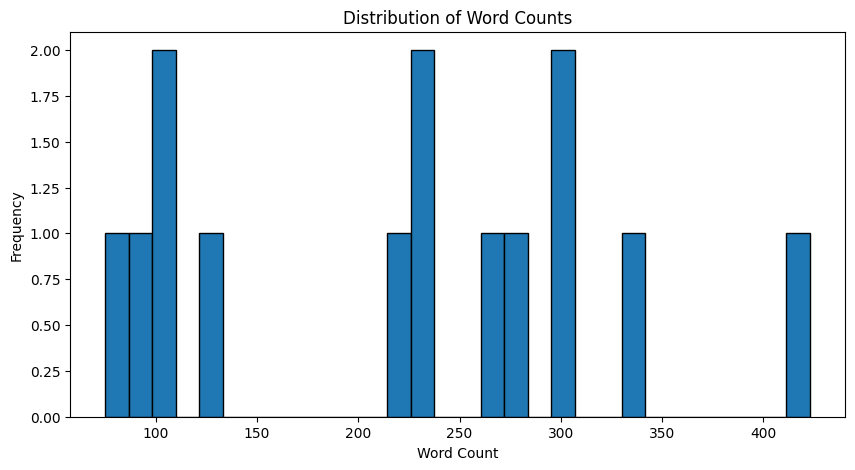

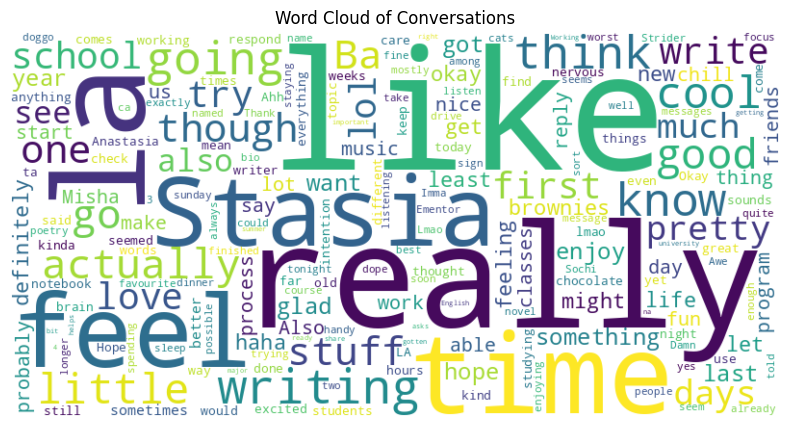

/tmp/ipykernel_158/2766548182.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mentor['sentiment'] = df_mentor['Response'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)


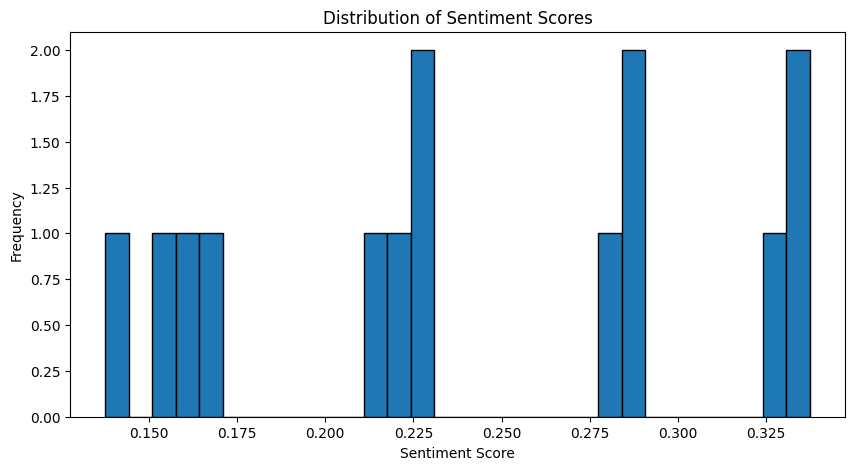

In [60]:

# Load the data
df_mentor = Relation42216[Relation42216['Mentor'] == 'Mentor']

# Convert 'Mentor Created at' and 'Response Datetime' to datetime
df_mentor['Mentor Created at'] = pd.to_datetime(df_mentor['Mentor Created at'])
df_mentor['Response Datetime'] = pd.to_datetime(df_mentor['Response Datetime'])

# Basic text statistics
df_mentor['word_count'] = df_mentor['Response'].apply(lambda x: len(str(x).split()))
df_mentor['sentence_count'] = df_mentor['Response'].apply(lambda x: len(str(x).split('.')))
df_mentor['char_count'] = df_mentor['Response'].apply(lambda x: len(str(x)))

# Plot the distribution of word counts
plt.figure(figsize=(10, 5))
plt.hist(df_mentor['word_count'], bins=30, edgecolor='k')
plt.title('Distribution of Word Counts')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

# Word Cloud of the most frequent words
text = ' '.join(df_mentor['Response'].dropna().tolist())
stop_words = set(stopwords.words('english'))
word_tokens = word_tokenize(text)
filtered_words = [word for word in word_tokens if word.isalnum() and word.lower() not in stop_words]
word_freq = Counter(filtered_words)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Conversations')
plt.show()

# Sentiment Analysis
from textblob import TextBlob

df_mentor['sentiment'] = df_mentor['Response'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
plt.figure(figsize=(10, 5))
plt.hist(df_mentor['sentiment'], bins=30, edgecolor='k')
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

# Conversation Dynamics - Response Time Analysis
# df['response_time'] = (df['Response Datetime'] - df['Mentor Created at']).dt.total_seconds() / 3600  # in hours
# plt.figure(figsize=(10, 5))
# plt.hist(df['response_time'].dropna(), bins=30, edgecolor='k')
# plt.title('Distribution of Response Times')
# plt.xlabel('Response Time (hours)')
# plt.ylabel('Frequency')
# plt.show()2

In [61]:
## Lets look at mentee

### Let's look at the mentor first
Message_length_mentee = Relation42216[Relation42216['Mentor'] == 'Mentee']['Response'].str.len()
Message_length_mentee.describe()

count      12.000000
mean     1157.750000
std       585.603671
min       252.000000
25%       843.750000
50%      1086.000000
75%      1402.500000
max      2434.000000
Name: Response, dtype: float64

/tmp/ipykernel_158/259429354.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mentee['Mentor Created at'] = pd.to_datetime(df_mentee['Mentor Created at'])
/tmp/ipykernel_158/259429354.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mentee['Response Datetime'] = pd.to_datetime(df_mentee['Response Datetime'])
/tmp/ipykernel_158/259429354.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

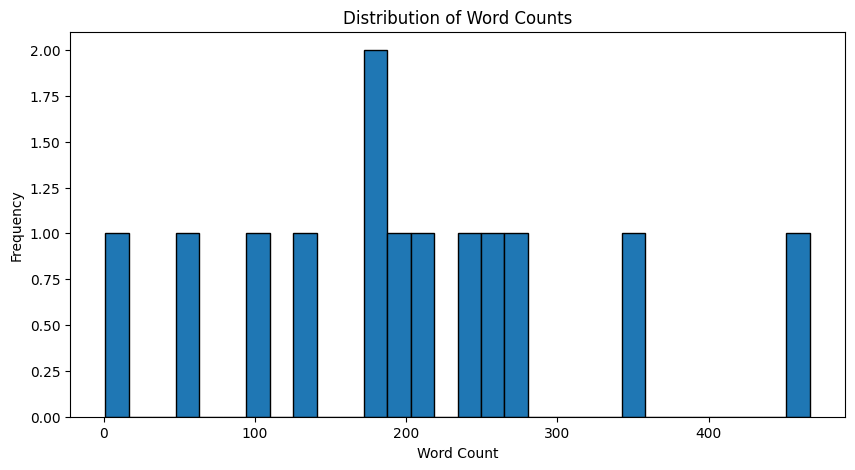

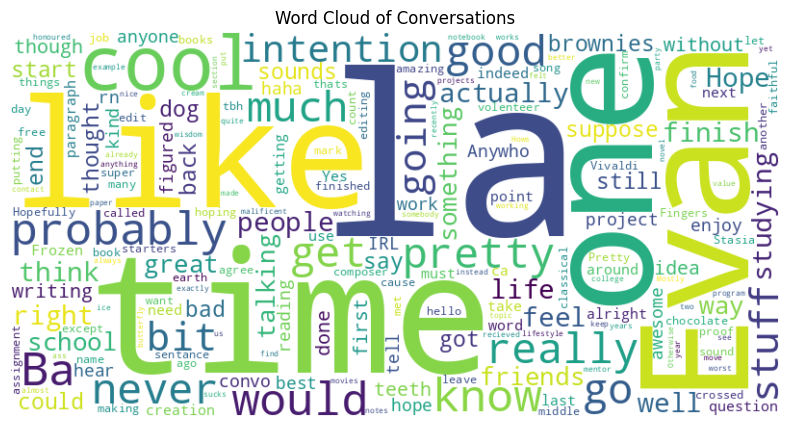

/tmp/ipykernel_158/259429354.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mentee['sentiment'] = df_mentee['Response'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)


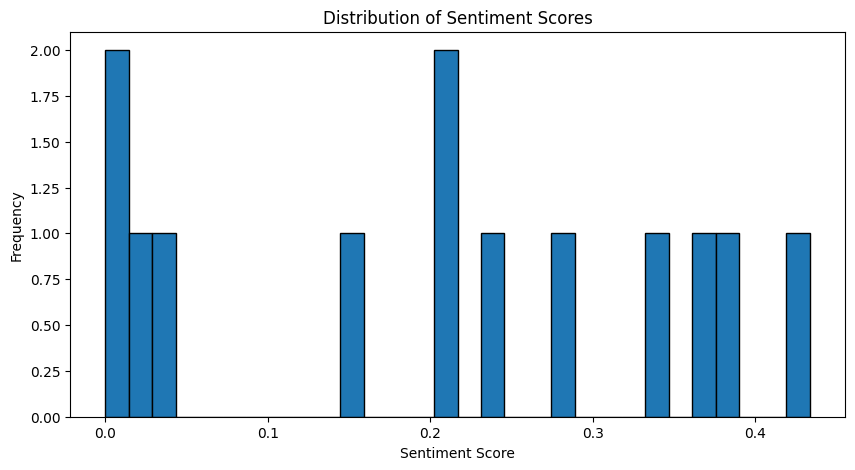

In [66]:

# Load the data
df_mentee = Relation42216[Relation42216['Mentor'] == 'Mentee']

# Convert 'Mentor Created at' and 'Response Datetime' to datetime
df_mentee['Mentor Created at'] = pd.to_datetime(df_mentee['Mentor Created at'])
df_mentee['Response Datetime'] = pd.to_datetime(df_mentee['Response Datetime'])

# Basic text statistics
df_mentee['word_count'] = df_mentee['Response'].apply(lambda x: len(str(x).split()))
df_mentee['sentence_count'] = df_mentee['Response'].apply(lambda x: len(str(x).split('.')))
df_mentee['char_count'] = df_mentee['Response'].apply(lambda x: len(str(x)))

# Plot the distribution of word counts
plt.figure(figsize=(10, 5))
plt.hist(df_mentee['word_count'], bins=30, edgecolor='k')
plt.title('Distribution of Word Counts')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

# Word Cloud of the most frequent words
text = ' '.join(df_mentee['Response'].dropna().tolist())
stop_words = set(stopwords.words('english'))
word_tokens = word_tokenize(text)
filtered_words = [word for word in word_tokens if word.isalnum() and word.lower() not in stop_words]
word_freq = Counter(filtered_words)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Conversations')
plt.show()

# Sentiment Analysis
from textblob import TextBlob

df_mentee['sentiment'] = df_mentee['Response'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
plt.figure(figsize=(10, 5))
plt.hist(df_mentee['sentiment'], bins=30, edgecolor='k')
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

# Conversation Dynamics - Response Time Analysis
# df['response_time'] = (df['Response Datetime'] - df['Mentor Created at']).dt.total_seconds() / 3600  # in hours
# plt.figure(figsize=(10, 5))
# plt.hist(df['response_time'].dropna(), bins=30, edgecolor='k')
# plt.title('Distribution of Response Times')
# plt.xlabel('Response Time (hours)')
# plt.ylabel('Frequency')
# plt.show()

### Mentor vs Mentee

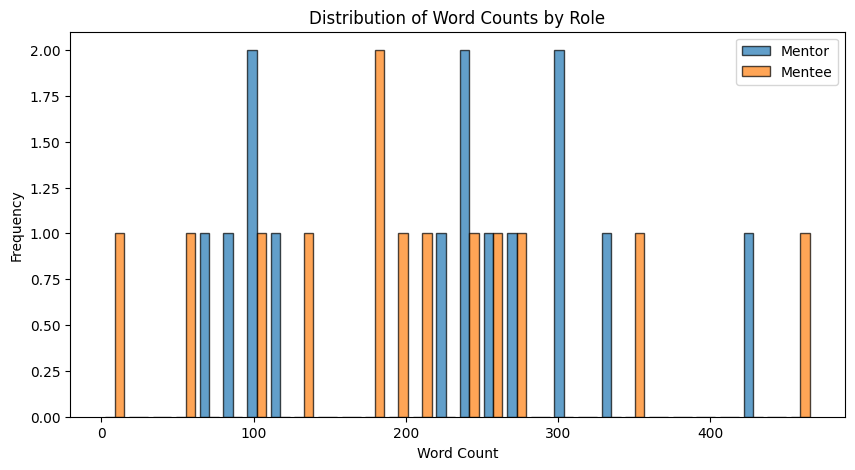

In [65]:
# Interaction Patterns

# Plot number of responses by mentor and mentee
plt.figure(figsize=(10, 5))
plt.hist([df_mentor['word_count'], df_mentee['word_count']], bins=30, label=['Mentor', 'Mentee'], edgecolor='k', alpha=0.7)
plt.title('Distribution of Word Counts by Role')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()

,Mentor ID,Mentee ID,Mentor Created at,Relationship ID,Response Datetime,Response,Mentor,Category,word_count,sentence_count,char_count,sentiment,response_time
1098,1047546975,1047541030,2021-09-27 17:28:00,42216,2021-10-01 15:52:00,"Why hello there! To be perfectly frank, I'm he...",Mentee,Posts in Start Here!,195,20,1071,0.433473,94.400000
1779,1047546975,1047541030,2021-09-27 17:28:00,42216,2021-10-01 18:49:00,Stasia it is. Always thought it was a cool nam...,Mentee,Posts in Start Here!,467,35,2434,0.234802,97.350000
2348,1047546975,1047541030,2021-09-27 17:28:00,42216,2021-10-01 21:10:00,"A rare species indeed, of the volenteer genus ...",Mentee,Posts in Start Here!,267,24,1402,0.389110,99.700000
2734,1047546975,1047541030,2021-09-27 17:28:00,42216,2021-10-02 19:35:00,I feel like he doesn't appreciate it nearly en...,Mentee,Posts in Start Here!,235,16,1257,0.215321,122.116667
285,1047546975,1047541030,2021-09-27 17:28:00,42216,2021-10-15 21:33:00,"I have to tell you, there isn't really a great...",Mentee,Posts in Finding Inspiration,349,29,1883,0.009295,436.083333
418,1047546975,1047541030,2021-09-27 17:28:00,42216,2021-10-19 20:28:00,"First off, I have to say this before continuei...",Mentee,Posts in Finding Inspiration,255,29,1404,0.023474,531.000000
508,1047546975,1047541030,2021-09-27 17:28:00,42216,2021-10-21 19:46:00,The disney never stops. Or movies made for kid...,Mentee,Posts in Finding Inspiration,177,12,882,0.206122,578.300000
552,1047546975,1047541030,2021-09-27 17:28:00,42216,2021-10-25 10:40:00,"Awesome about the movies, awesome about the no...",Mentee,Posts in Finding Inspiration,109,11,588,0.039520,665.200000
561,1047546975,1047541030,2021-09-27 17:28:00,42216,2021-10-25 10:40:00,NaN,Mentee,Posts in Finding Inspiration,1,1,3,0.000000,665.200000
652,1047546975,1047541030,2021-09-27 17:28:00,42216,2021-10-29 19:43:00,"Okay, first off, I think it's so strange that ...",Mentee,Posts in Strategic Studying,136,8,729,0.147727,770.250000


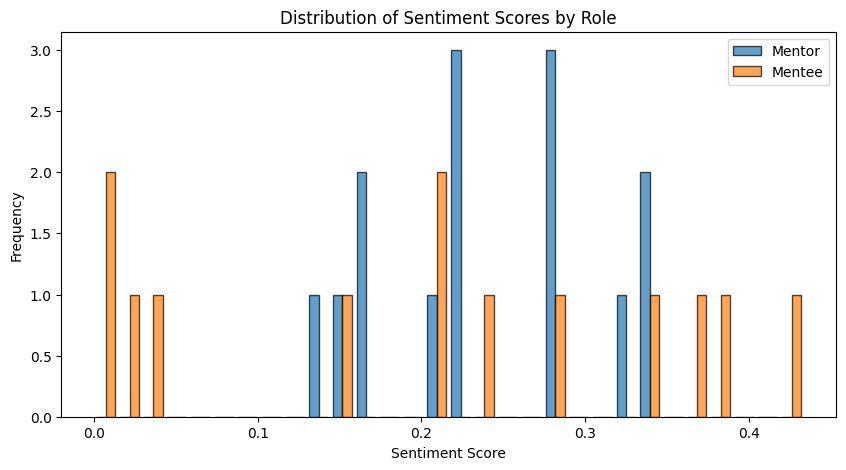

In [68]:
### Sentiment analysis tgt 

# Sentiment Analysis
from textblob import TextBlob
import matplotlib.pyplot as plt

# Assuming df_mentor and df_mentee are your DataFrames

df_mentor.loc[:, 'sentiment'] = df_mentor['Response'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
df_mentee.loc[:, 'sentiment'] = df_mentee['Response'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

plt.figure(figsize=(10, 5))
plt.hist([df_mentor['sentiment'], df_mentee['sentiment']], bins=30, label=['Mentor', 'Mentee'], edgecolor='k', alpha=0.7)
plt.title('Distribution of Sentiment Scores by Role')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# # Sentiment Analysis
# from textblob import TextBlob

# df_mentee['sentiment'] = df_mentee['Response'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
# plt.figure(figsize=(10, 5))
# plt.hist(df_mentee['sentiment'], bins=30, edgecolor='k')
# plt.title('Distribution of Sentiment Scores')
# plt.xlabel('Sentiment Score')
# plt.ylabel('Frequency')
# plt.show()


# plt.figure(figsize=(10, 5))
# plt.hist([df_mentor['word_count'], df_mentee['word_count']], bins=30, label=['Mentor', 'Mentee'], edgecolor='k', alpha=0.7)
# plt.title('Distribution of Word Counts by Role')
# plt.xlabel('Word Count')
# plt.ylabel('Frequency')
# plt.legend(loc='upper right')
# plt.show()

### Trying google news embeddingsd

In [71]:
pip install numpy==1.25.0


Note: you may need to restart the kernel to use updated packages.


In [72]:
import gensim
import gensim.downloader as api

In [ ]:
google_news_vectors = api.load('word2vec-google-news-300')

[===-----------------------------------------------] 6.0% 100.5/1662.8MB downloaded

In [ ]:
google_news_vectors

In [ ]:
import spacy
from gensim.utils import simple_preprocess
from gensim.models import Phrases
from gensim.models.phrases import Phraser

# Removing stopwords
def remove_stopwords(texts, stopwords):
    return [[word for word in simple_preprocess(str(doc)) if word not in stopwords] for doc in texts]

# Tokenization
def tokenize_text(texts):
    return [simple_preprocess(str(doc)) for doc in texts]

# Lemmatization
def lemmatization(texts, allowed_postags=["NOUN", "ADJ", "VERB", "ADV"]):
    nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])
    texts_out = []
    for text in texts:
        doc = nlp(" ".join(text))
        new_text = []
        for token in doc:
            if token.pos_ in allowed_postags:
                new_text.append(token.lemma_)
        texts_out.append(new_text)
    return texts_out

# Use the df from earlier, picking the text column response
speech_texts = df['Response'].astype(str).tolist()

# Tokenize, then lemmatize and remove stopwords
data_words = tokenize_text(speech_texts)
lemmatized_texts = lemmatization(data_words)
lemmatized_texts2 = remove_stopwords(lemmatized_texts, stopwords)

# Convert back to string
processed_texts_strings = [' '.join(text) if text else '' for text in lemmatized_texts2]

# Creating bigrams and trigrams
bigram_phrases = Phrases(lemmatized_texts2, min_count=5, threshold=100)
trigram_phrases = Phrases(bigram_phrases[lemmatized_texts2], threshold=100)

bigram = Phraser(bigram_phrases)
trigram = Phraser(trigram_phrases)

def make_bigrams(texts):
    return [bigram[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram[bigram[doc]] for doc in texts]

data_bigrams = make_bigrams(lemmatized_texts2)
data_bigrams_trigrams = make_trigrams(data_bigrams)

# Update the DataFrame with processed responses
df['processed_response'] = [' '.join(text) if text else '' for text in data_bigrams_trigrams]

df[['Response', 'processed_response']].head()